# Correspondance Analysis - Women Work

In [1]:
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/women_work.txt"
women_work = pd.read_table(url,header=0)

In [2]:
# Modèle avec colonnes supplémentaires
from scientisttools.decomposition import CA
my_ca1 = CA(n_components=None,
            row_labels=women_work.index.values,
            col_labels=women_work.columns[:3].values,
            row_sup_labels=None,
            col_sup_labels=women_work.columns[3:].values).fit(women_work)

c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
c:\Users\duver\AppData\Local\Programs\Python\Python310\l

In [3]:
from scientisttools.ggplot import fviz_ca_col

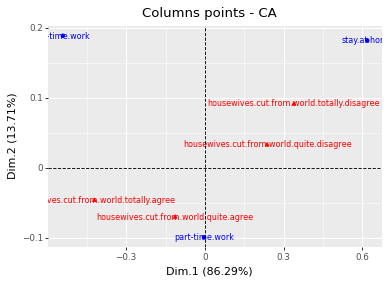

In [4]:
p = fviz_ca_col(self=my_ca1)
print(p)

In [5]:
from scientisttools.extractfactor import dimdesc
DimDesc = dimdesc(my_ca1)
DimDesc.keys()

dict_keys(['Dim.1', 'Dim.2'])

In [6]:
DimDesc["Dim.1"]["row"]

,coord
both.man.and.woman.work,-0.558605
man.morks.more,-0.243759
only.man.works,0.309562


In [7]:
DimDesc["Dim.1"]["col"]

,coord
full-time.work,-0.541113
housewives.cut.from.world.totally.agree,-0.421395
housewives.cut.from.world.quite.agree,-0.113230
part-time.work,-0.003638
housewives.cut.from.world.quite.disagree,0.236928
housewives.cut.from.world.totally.disagree,0.338720
stay.at.home,0.618376


In [8]:
DimDesc["Dim.2"]["row"]

,coord
man.morks.more,-0.172207
only.man.works,0.038173
both.man.and.woman.work,0.233387


In [9]:
DimDesc["Dim.2"]["col"]

,coord
part-time.work,-0.099654
housewives.cut.from.world.quite.agree,-0.069851
housewives.cut.from.world.totally.agree,-0.045932
housewives.cut.from.world.quite.disagree,0.033732
housewives.cut.from.world.totally.disagree,0.092381
stay.at.home,0.182662
full-time.work,0.189387


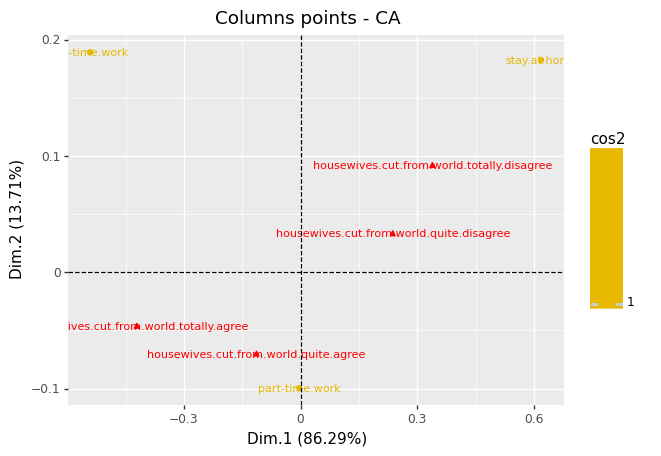

In [10]:
from scientisttools.ggplot import fviz_ca_col
p = fviz_ca_col(my_ca1,color="cos2")
print(p)